In [1]:
import numpy as np

In [49]:
# !pip install wordcloud


In [105]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

import warnings
warnings.filterwarnings('ignore')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm", disable=['parser', 'ner'])

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
df = pd.read_excel('/content/output-2.xlsx')

In [81]:
filtered_reviews1 = df[df['Suggested_Topic'] == 'XTRA - Easter Egg']

In [82]:
filtered_reviews2 = filtered_reviews1[['Review_ID']]

In [83]:
filtered_reviews2 = filtered_reviews2.reset_index(drop=True)

In [84]:
filtered_reviews2.columns

Index(['Review_ID'], dtype='object')

In [85]:
filtered_reviews2

,Review_ID
0,5730
1,5577
2,2495
3,5719
4,7478
...,...
408,5785
409,4785
410,7315
411,4444


In [86]:
filtered_reviews2.to_csv('/content/Team_Alpha_easter_eggs.csv', index=False)

In [87]:
filtered_reviews1

,Review_ID,Date,Rating,Review_Language,Version,Review_Likes,Review,Suggested_Topic,Similarity
3640,5730,2021-06-16 01:46:22,5,en,20.27.0,0,Is wonderful the staff was nice awsome,XTRA - Easter Egg,0.805345
4497,5577,2021-04-25 14:08:47,3,en,20.25.1,0,"The overall experience was good, given mostly ...",XTRA - Easter Egg,0.791974
4980,2495,2023-02-25 14:26:32,5,en,20.46.2,0,service was excellent the staffs were very fri...,XTRA - Easter Egg,0.787495
4986,5719,2021-05-20 13:44:38,5,en,20.26.0,0,i would stay here again.the service was fantas...,XTRA - Easter Egg,0.787413
5051,7478,2023-01-07 12:10:21,5,en,20.45.1,0,"Excellent stay. The hotel is virtually new, so...",XTRA - Easter Egg,0.786421
...,...,...,...,...,...,...,...,...,...
9107,5785,2023-01-08 10:45:36,3,en,20.45.1,0,No breakfast. Have to pay for restaurant break...,XTRA - Easter Egg,0.656416
9144,4785,2021-03-26 12:21:58,1,en,20.24.0,0,hair in the bathtub and poop sweared on the ba...,XTRA - Easter Egg,0.646168
9149,7315,2023-02-06 14:15:39,2,en,20.46.2,0,"Moldy, musty smelling rooms. Hair in tub. Dir...",XTRA - Easter Egg,0.644511
9150,4444,2021-07-21 10:34:54,2,en,20.28.0,0,Room was only half made up from the night befo...,XTRA - Easter Egg,0.643634


In [88]:
Topics = [ "Errors",
            "Cheque Deposit",
            "2SV",
            "Login and Logout Issues",
            "Biometric Login",
            "Fee",
            "Request New Card",
            "International Money Movement",
            "Save and Share Statements",
            "Quick Balance",
            "Credit Score",
            "Application Performance",
            "Investments",
            "Email Money Transfer",
            "Info Alerts",
            "Accessibility",
            "Rewards",
            "Appointment Booking",
            "Budgeting",
            "Chat" ]

In [89]:
# Filter the DataFrame to include only the specified topics
filtered_df = df[df['Suggested_Topic'].isin(Topics)]

# Count the occurrences of each topic
topic_counts = filtered_df['Suggested_Topic'].value_counts().reset_index()

# Rename columns for clarity
topic_counts.columns = ['TOPIC_NAME', 'NUMBER_OF_OCCURRENCE']

# Sort the DataFrame by number of occurrences and then by topic name
topic_counts = topic_counts.sort_values(by=['NUMBER_OF_OCCURRENCE', 'TOPIC_NAME'], ascending=[False, True])

# Assign ranks based on the sorted order
topic_counts['RANKING'] = range(1, len(topic_counts) + 1)

In [90]:
# Define the mapping from old names to new names
topic_name_mapping = {
    "Errors": "Errors",
    "Cheque Deposit": "Cheque_Deposit",
    "2SV": "2SV",
    "Login and Logout Issues": "Login_and_Logout_Issues",
    "Biometric Login": "Biometric_Login",
    "Fee": "Fee",
    "Request New Card": "Request_New_Card",
    "International Money Movement": "International_Money_Movement",
    "Save and Share Statements": "Save_and_Share_Statements",
    "Quick Balance": "Quick_Balance",
    "Credit Score": "Credit_Score",
    "Application Performance": "Application_Performance",
    "Investments": "Investments",
    "Email Money Transfer": "Email_Money_Transfer",
    "Info Alerts": "Info_Alerts",
    "Accessibility": "Accessibility",
    "Rewards": "Rewards",
    "Appointment Booking": "Appointment_Booking",
    "Budgeting": "Budgeting",
    "Chat": "Chat"
}

# Replace the topic names in the DataFrame
topic_counts['TOPIC_NAME'] = topic_counts['TOPIC_NAME'].replace(topic_name_mapping)



In [91]:
topic_counts

,TOPIC_NAME,NUMBER_OF_OCCURRENCE,RANKING
0,Errors,1979,1
1,Cheque_Deposit,746,2
2,Login_and_Logout_Issues,553,3
3,2SV,412,4
4,Email_Money_Transfer,242,5
5,Application_Performance,177,6
6,Investments,120,7
7,International_Money_Movement,99,8
8,Fee,95,9
10,Accessibility,72,10


In [92]:
topic_counts.to_csv('/content/Team_Alpha_topics.csv', index=False)

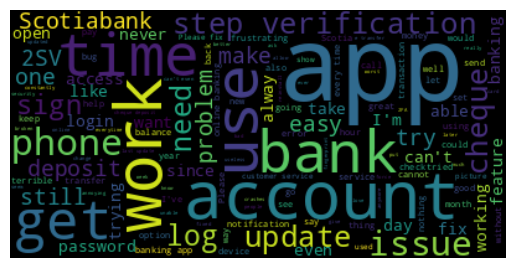

In [103]:
stopword = set(stopwords.words('english'))
text = " ".join(review for review in filtered_df.Review)
wordcloud = WordCloud(stopwords=stopword).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()